In [1]:
import ccf2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

pd.options.display.max_columns = None
pd.options.display.max_rows = None
path = '../input/'

# load data

In [2]:
data = ccf2.loaddata(path)

In [3]:
data.shape

(36960, 12)

In [4]:
data.head()

,adcode,bodyType,id,model,province,regMonth,regYear,popularity,carCommentVolum,newsReplyVolum,label,mt
0,310000,0,0,0,上海,1,2016,1479.0,11.0,106.0,292.0,1
1,530000,0,0,0,云南,1,2016,1594.0,11.0,106.0,466.0,1
2,150000,0,0,0,内蒙古,1,2016,1479.0,11.0,106.0,257.0,1
3,110000,0,0,0,北京,1,2016,2370.0,11.0,106.0,408.0,1
4,510000,0,0,0,四川,1,2016,3562.0,11.0,106.0,610.0,1


# 数据分析

## 数据量分析

In [4]:
'''
省份：22个
车型：60个
训练时长：201601-201712  24个月
预测时长：201801-201804  4个月
'''

'\n省份：22个\n车型：60个\n训练时长：201601-201712  24个月\n预测时长：201801-201804  4个月\n'

In [5]:
test.head()

,id,province,adcode,model,regYear,regMonth,forecastVolum,bodyType
0,1,上海,310000,3c974920a76ac9c1,2018,1,NaN,SUV
1,1,上海,310000,3c974920a76ac9c1,2018,1,NaN,SUV
2,1,上海,310000,3c974920a76ac9c1,2018,1,NaN,SUV
3,1,上海,310000,3c974920a76ac9c1,2018,1,NaN,SUV
4,1,上海,310000,3c974920a76ac9c1,2018,1,NaN,SUV


In [6]:
train_sales_data.head()

,province,adcode,model,bodyType,regYear,regMonth,salesVolume
0,上海,310000,3c974920a76ac9c1,SUV,2016,1,292
1,云南,530000,3c974920a76ac9c1,SUV,2016,1,466
2,内蒙古,150000,3c974920a76ac9c1,SUV,2016,1,257
3,北京,110000,3c974920a76ac9c1,SUV,2016,1,408
4,四川,510000,3c974920a76ac9c1,SUV,2016,1,610


In [7]:
data.head()

,adcode,bodyType,forecastVolum,id,model,province,regMonth,regYear,salesVolume,popularity,carCommentVolum,newsReplyVolum,yearmonth
0,310000,SUV,NaN,NaN,3c974920a76ac9c1,上海,1,2016,292.0,1479.0,11.0,106.0,201601
1,530000,SUV,NaN,NaN,3c974920a76ac9c1,云南,1,2016,466.0,1594.0,11.0,106.0,201601
2,150000,SUV,NaN,NaN,3c974920a76ac9c1,内蒙古,1,2016,257.0,1479.0,11.0,106.0,201601
3,110000,SUV,NaN,NaN,3c974920a76ac9c1,北京,1,2016,408.0,2370.0,11.0,106.0,201601
4,510000,SUV,NaN,NaN,3c974920a76ac9c1,四川,1,2016,610.0,3562.0,11.0,106.0,201601


In [20]:
data['province'].unique()

array(['上海', '云南', '内蒙古', '北京', '四川', '安徽', '山东', '山西', '广东', '广西', '江苏',
       '江西', '河北', '河南', '浙江', '湖北', '湖南', '福建', '辽宁', '重庆', '陕西', '黑龙江'],
      dtype=object)

In [21]:
data['model'].unique()

array(['3c974920a76ac9c1', '3d7554f1f56dd664', '2d0d2c3403909fdb',
       'a28bb927b6fcb33c', '17bc272c93f19d56', '2a2ab41f8f6ff1cb',
       'c06a2a387c0ee510', '7023efdab9cedc03', 'af6f4f548684e14d',
       '7cf283430b3b5e38', 'd4efbebb087fd03f', '7245e0ee27b195cd',
       '8c915fe4632fb9fa', '6155b214590c66e6', '28e29f2c03dcd84c',
       '37aa9169b575ef79', '63065128401bb3ff', 'ea489c253676aafc',
       'cd5841d44fd7625e', 'b25c4e2e3856af22', '4a103c30d593fbbe',
       '7a7885e2d7c00bcf', '346393c2c6305fb1', '02aab221aabc03b9',
       '5d7fb682edd0f937', 'a207df29ec9583f0', 'b4be3a4917289c82',
       'ef76a85c4b39f693', 'bb9fbec9a2833839', 'da457d15788fe8ee',
       '6858d6dfe680bdf7', '79de4e4b24c35b04', '12f8b7e14947c34d',
       '04e66e578f653ab9', 'dff803b4024d261d', '61e73e32ad101892',
       'a432c483b5beb856', '0797526c057dcf5b', '936168bd4850913d',
       'cc21c7e91a3b5a0c', '7aab7fca2470987e', 'fde95ea242abd896',
       '97f15de12cfabbd5', 'f5d69960089c3614', '5b1c11c3efed53

In [8]:
data['bodyType'].unique()

array(['SUV', 'Sedan', 'MPV', 'Hatchback'], dtype=object)

In [9]:
gc.collect()

1088

## bodyType

In [10]:
month = ['201601','201602','201603','201604','201605','201606','201607','201608','201609','201610','201611','201612',
         '201701','201702','201703','201704','201705','201706','201707','201708','201709','201710','201711','201712']
type = ['label','popularity','carCommentVolum','newsReplyVolum']

In [11]:
## 车身销售情况
df2 = data[(data['mt']<=24)].groupby(['bodyType','mt'])[type].sum()
bodyType = data['bodyType'].unique()

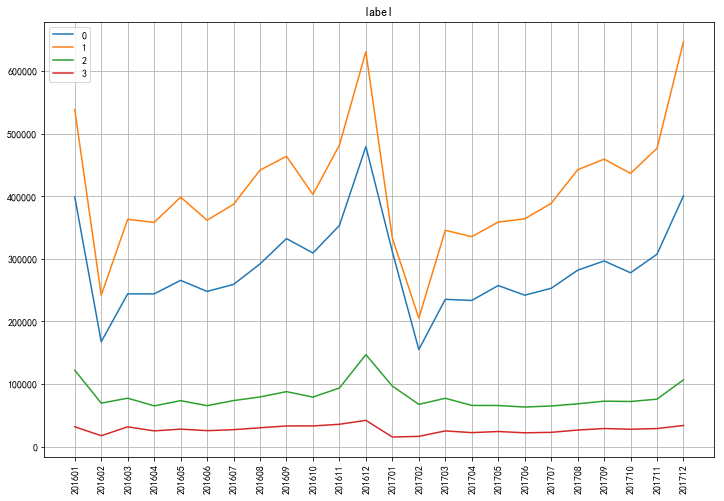

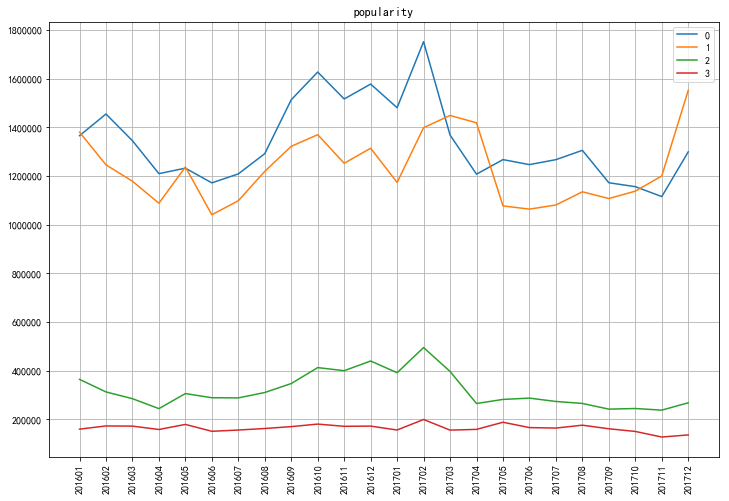

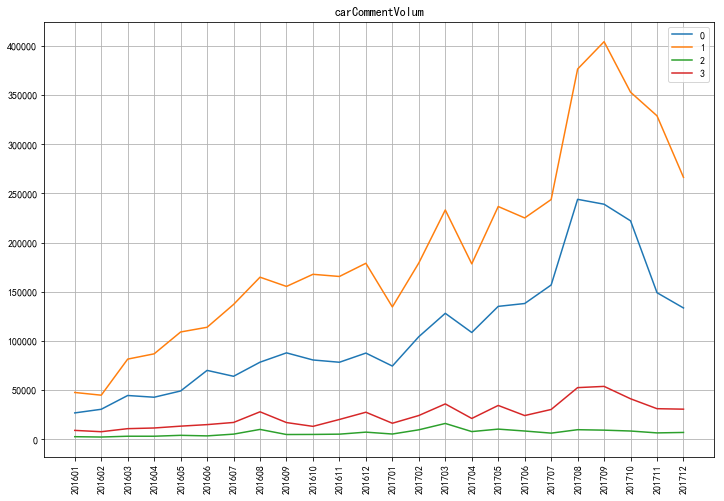

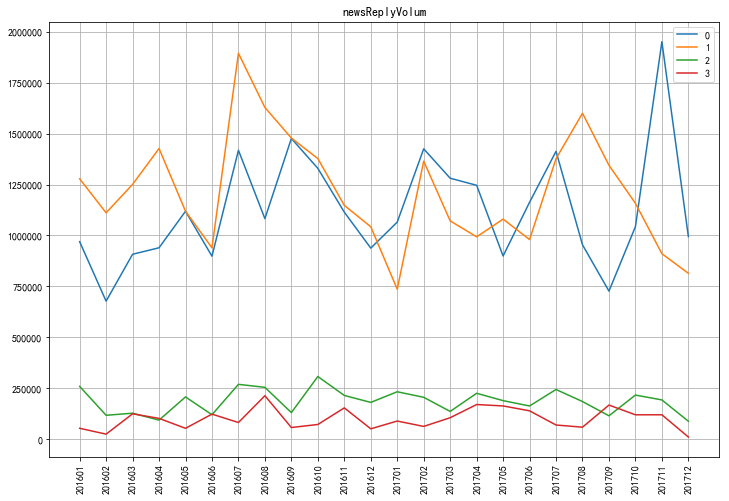

In [12]:
for t in type:
    plt.figure(num=1,figsize=(12,8))
    for m in bodyType:
        plt.plot(month,df2.loc[(m)][t])
    plt.grid(True)
    plt.legend(labels=bodyType,loc='best')
    plt.title(t)
    plt.xticks(rotation=90)
    plt.show()


## model

In [13]:
#  model  24个月的数据表现
df1 = data[(data['mt']<=24)].groupby(['model','mt'])[type].sum()
model = data['model'].unique()

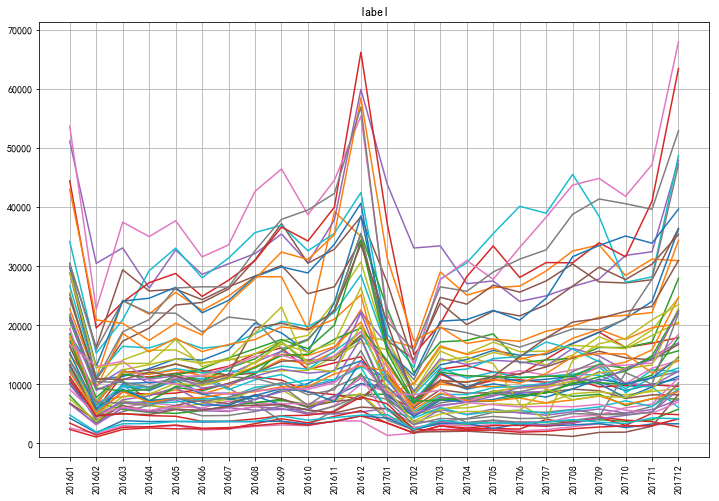

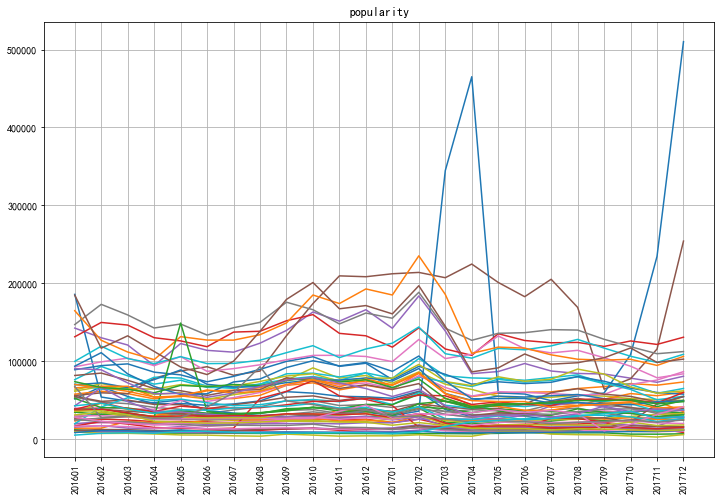

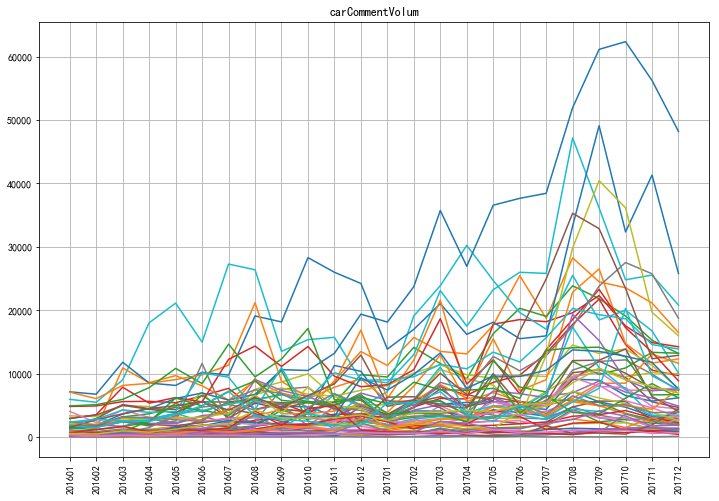

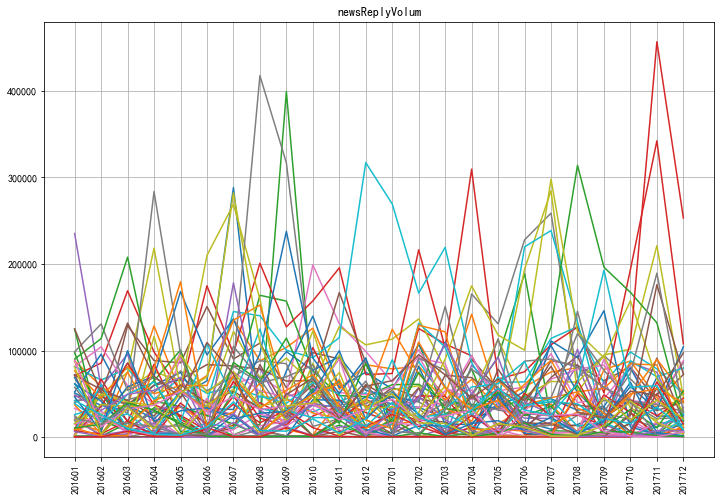

In [14]:
for t in type:
    plt.figure(num=1,figsize=(12,8))
    for m in model:
        plt.plot(month,df1.loc[(m)][t])
    plt.grid(True)
#     plt.legend(labels=model,loc='best')
    plt.title(t)
    plt.xticks(rotation=90)
    plt.show()

## 月销售量与搜索量

In [18]:
df4 = data[(data['mt']<=24)].groupby(['mt'])[type].sum()

In [100]:
df4.head()

,salesVolume,popularity,carCommentVolum,newsReplyVolum
yearmonth,,,,
201601,1090983.0,3268372.0,86108.0,2561372.0
201602,496058.0,3184483.0,85338.0,1932040.0
201603,715907.0,2978665.0,139964.0,2411552.0
201604,692044.0,2698399.0,144254.0,2562824.0
201605,765268.0,2952525.0,175626.0,2499640.0


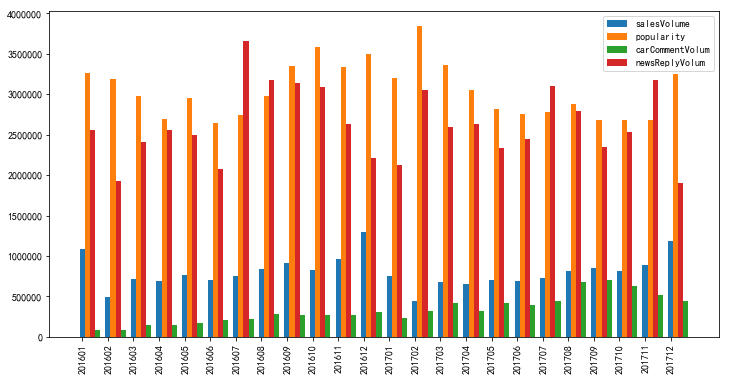

In [20]:
index = np.arange(24)
width=0.2
plt.figure(figsize=(12,6))
plt.bar(month,df4.label,width,label='salesVolume')
plt.bar(index+width,df4.popularity,width,label='popularity')
plt.bar(index+width*3,df4.carCommentVolum,width,label='carCommentVolum')
plt.bar(index+width*2,df4.newsReplyVolum,width,label='newsReplyVolum')
plt.legend()
plt.xticks(rotation=90)
plt.show()

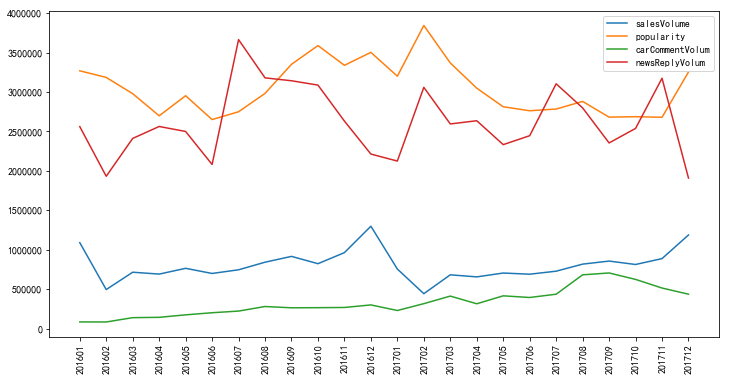

In [112]:
plt.figure(figsize=(12,6))
plt.plot(month,df4.salesVolume,label='salesVolume')
plt.plot(month,df4.popularity,label='popularity')
plt.plot(month,df4.carCommentVolum,label='carCommentVolum')
plt.plot(month,df4.newsReplyVolum,label='newsReplyVolum')
plt.legend()
plt.xticks(rotation=90)
plt.show()

## 各省份总销量

In [74]:
df3 = data[(data['yearmonth']<201800)].groupby(['province'])[type].sum()
province = data['province'].unique()

df3.sort_values(['salesVolume'],inplace=True)

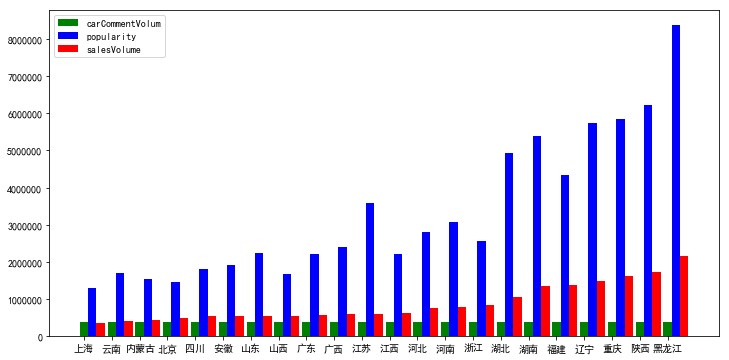

In [98]:
bar_width = 0.3
index = np.arange(22)
plt.figure(figsize=(12,6))
plt.bar(df.index,df3.carCommentVolum,bar_width,color='g',label='carCommentVolum')
plt.bar(index+bar_width,df3.popularity,bar_width,color='b',label='popularity')
plt.bar(index+bar_width*2,df3.salesVolume,bar_width,color='r',label='salesVolume')
plt.legend()
plt.show()

# label分布

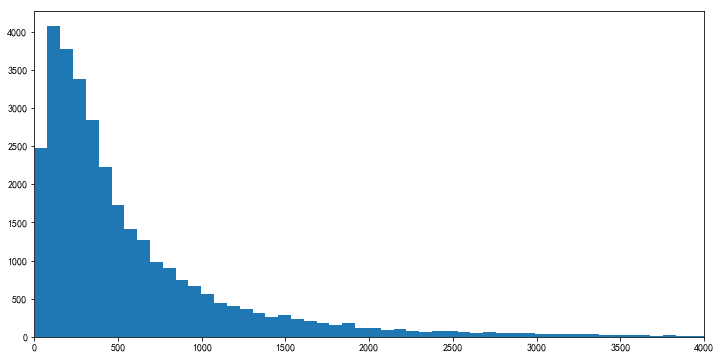

In [18]:
plt.figure(figsize=(12,6))
plt.hist(data.loc[data['mt']<=24]['label'].sort_values(),bins=200)
plt.xlim(0,4000)
plt.show()

In [19]:
data['model_weight'] = data.groupby('model')['label'].transform('mean') 
data['n_label'] = data['label'] / data['model_weight'] # 把目标标准化

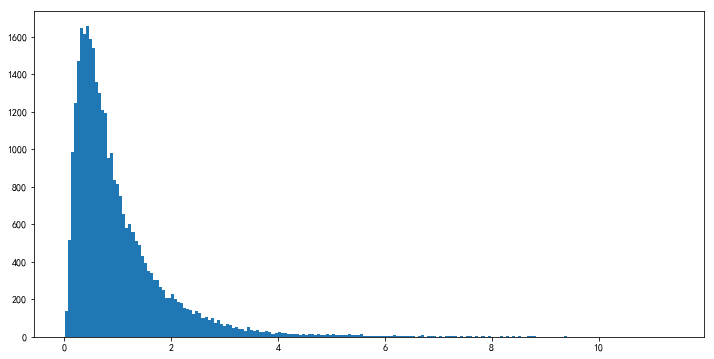

In [21]:
plt.figure(figsize=(12,6))
plt.hist(data.loc[data['mt']<=24]['n_label'].sort_values(),bins=200)
plt.show()

In [23]:
import math
data['ln_label'] = data['label'].apply(lambda x: math.log(x))

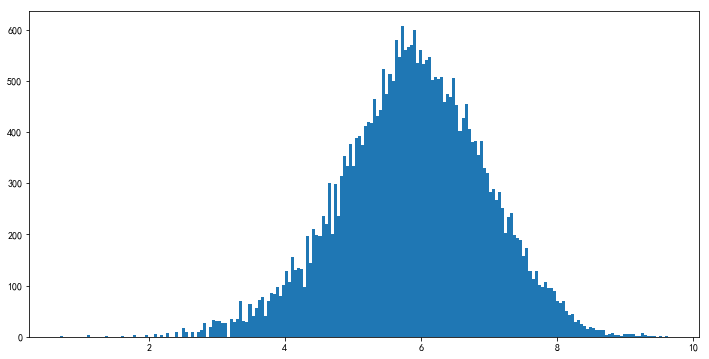

In [24]:
plt.figure(figsize=(12,6))
plt.hist(data.loc[data['mt']<=24]['ln_label'].sort_values(),bins=200)
plt.show()